In [1]:
import numpy as np
import matplotlib.pyplot as plt
import viz_tools

plt.rcParams.update({
    "text.usetex": True,          # Use LaTeX for all text
    "font.family": "serif",       # Use serif font (LaTeX default)
    "font.size": 20,              # Font size
})

In [2]:
# ==========================
#  Parametri spaziali
# ==========================
L = 10.0          # dominio: x in [-L, L]
N = 2000          # numero di punti spaziali
dx = 2 * L / N

x = np.linspace(-L, L - dx, N)  # griglia periodica

In [3]:
# ==========================
#  Dato iniziale del paper
#  w0(x) = (4x / (1+x^2)^3) * exp(-x^2)
# ==========================
W2 = 1.0 / (1.0 + x**2)**2
W1 = 4.0 * x / (1.0 + x**2)**3
w = W1 * np.exp(-x**2)   # stato iniziale w(x,0)

In [4]:
# plt.figure(figsize=(8, 5))
# plt.plot(x, w)
# plt.xlim(-1, 1)


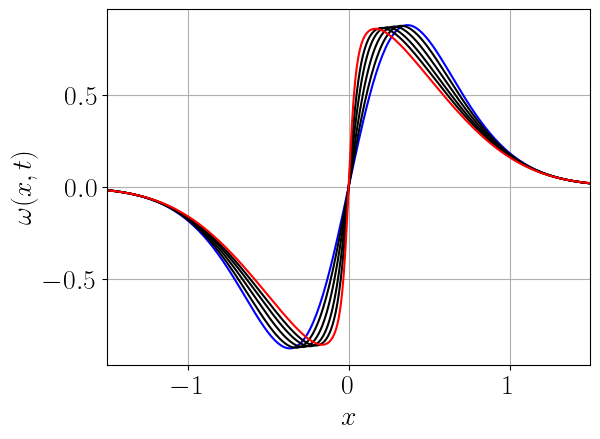

In [5]:
# ==========================
#  Funzione flusso
#  f(w) = -0.5 * w^2
# ==========================
def flux(w):
    return -0.5 * w**2

# ==========================
#  Loop in tempo (Lax–Friedrichs)
#  w_t + (f(w))_x = 0
#  w^{n+1}_j = 0.5*(w_{j+1}^n + w_{j-1}^n)
#              - (dt / (2 dx)) * ( f_{j+1}^n - f_{j-1}^n )
t = 0.0
t_final = 0.5      # prova a modificarlo per avvicinarti al blow-up
CFL = 0.5

# tempi a cui vogliamo salvare uno snapshot
snap_times = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25]
snap_index = 0

times_history = [t]
max_history = [np.max(np.abs(w))]
w = W1 * np.exp(-x**2)   # stato iniziale w(x,0)
# ==========================
while t < t_final:
    maxw = np.max(np.abs(w))
    if maxw < 1e-10:
        dt = 1e-3  # fallback se quasi nullo
    else:
        dt = CFL * dx / maxw

    if t + dt > t_final:
        dt = t_final - t

    f = flux(w)

    # indici periodici (shift a destra e sinistra)
    w_plus  = np.roll(w, -1)   # j+1
    w_minus = np.roll(w,  1)   # j-1
    f_plus  = np.roll(f, -1)
    f_minus = np.roll(f,  1)

    # Lax–Friedrichs update
    w_new = 0.5 * (w_plus + w_minus) - (dt / (2 * dx)) * (f_plus - f_minus)

    w = w_new
    t += dt

    # salviamo norma L-infinito
    times_history.append(t)
    max_history.append(np.max(np.abs(w)))

    # plottiamo qualche istantanea
    if snap_index < len(snap_times) and t >= snap_times[snap_index] - 1e-12:
        if snap_index == 0:
            color = 'blue'
        elif snap_index == len(snap_times) - 1:
            color = 'red'
        else: 
            color = 'black'
        plt.plot(x, w, color=color)
        
        # plt.show()
        snap_index += 1
plt.xlim(-1.5, 1.5)
plt.xlabel(r"$x$")
plt.ylabel(r"$\omega(x,t)$")
plt.grid()
plt.tight_layout()
plt.savefig("plots/burgers/burgers_laxfriedrichs.pdf", bbox_inches='tight')
plt.show()
# plt.legend()
# plt.tight_layout()

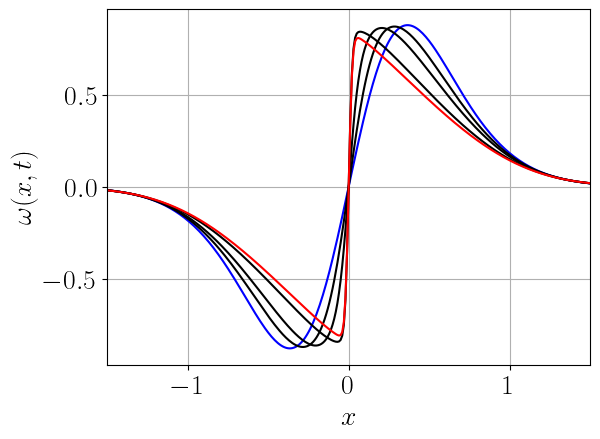

In [6]:
# ==========================
#  Funzione flusso
#  f(w) = -0.5 * w^2
# ==========================
def flux(w):
    return -0.5 * w**2

# ==========================
#  Loop in tempo (Lax–Friedrichs)
#  w_t + (f(w))_x = 0
#  w^{n+1}_j = 0.5*(w_{j+1}^n + w_{j-1}^n)
#              - (dt / (2 dx)) * ( f_{j+1}^n - f_{j-1}^n )
t = 0.0
t_final = 0.5      # prova a modificarlo per avvicinarti al blow-up
CFL = 0.5

# tempi a cui vogliamo salvare uno snapshot
snap_times = [0.0, 0.1, 0.2, 0.4, 0.5]
snap_index = 0

w = W1 * np.exp(-x**2)   # stato iniziale w(x,0)

times_history = [t]
w_history = [w]
max_history = [np.max(np.abs(w))]
# ==========================
while t < t_final:
    maxw = np.max(np.abs(w))
    if maxw < 1e-10:
        dt = 1e-3  # fallback se quasi nullo
    else:
        dt = CFL * dx / maxw

    if t + dt > t_final:
        dt = t_final - t

    f = flux(w)

    # indici periodici (shift a destra e sinistra)
    w_plus  = np.roll(w, -1)   # j+1
    w_minus = np.roll(w,  1)   # j-1
    f_plus  = np.roll(f, -1)
    f_minus = np.roll(f,  1)

    # Lax–Friedrichs update
    w_new = 0.5 * (w_plus + w_minus) - (dt / (2 * dx)) * (f_plus - f_minus)

    w = w_new
    w_history.append(w)
    t += dt

    # salviamo norma L-infinito
    times_history.append(t)
    max_history.append(np.max(np.abs(w)))

    # plottiamo qualche istantanea
    if snap_index < len(snap_times) and t >= snap_times[snap_index] - 1e-12:
        if snap_index == 0:
            color = 'blue'
        elif snap_index == len(snap_times) - 1:
            color = 'red'
        else: 
            color = 'black'
        plt.plot(x, w, color=color)
        
        # plt.show()
        snap_index += 1

w_history = np.array(w_history) 

plt.xlim(-1.5, 1.5)
plt.xlabel(r"$x$")
plt.ylabel(r"$\omega(x,t)$")
plt.grid()
plt.tight_layout()
plt.savefig("plots/burgers/burgers_laxfriedrichs_post.pdf", bbox_inches='tight')
plt.show()
# plt.legend()
# plt.tight_layout()

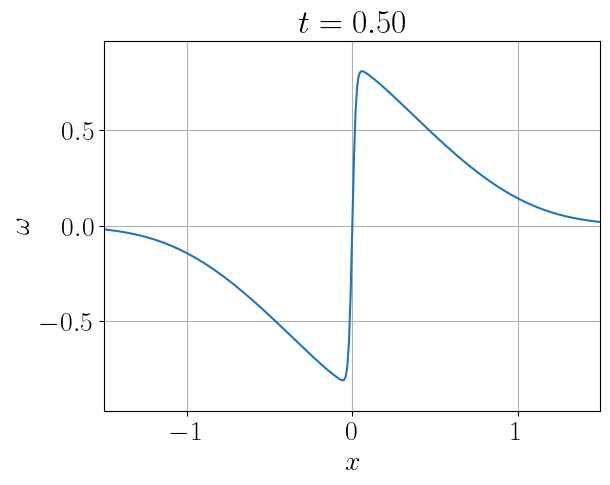

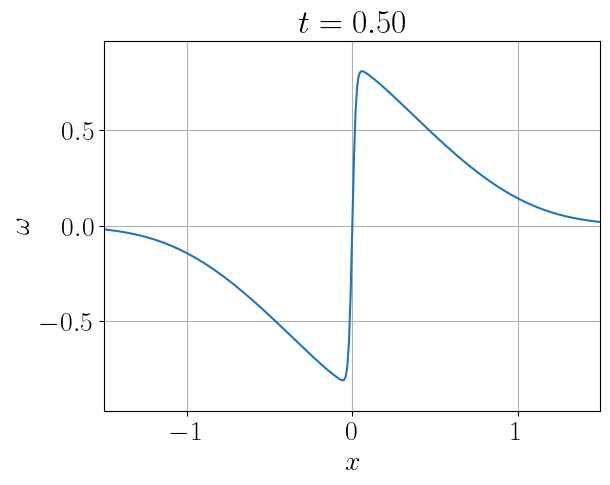

In [7]:
anim = viz_tools.anim_1D(x, w_history.T, times_history, True, (-1.5, 1.5), (-1.2, 1.2), f'plots/burgers/burgers_laxf_vid', 'mp4')
anim = viz_tools.anim_1D(x, w_history.T, times_history, True, (-1.5, 1.5), (-1.2, 1.2), f'plots/burgers/burgers_laxf_vid', 'gif')